In [1]:
import requests
import pandas as pd
from vega_datasets import data

# SF Temps

In [2]:
data.sf_temps()

temp                date
0     47.8 2010-01-01 00:00:00
1     47.4 2010-01-01 01:00:00
2     46.9 2010-01-01 02:00:00
3     46.5 2010-01-01 03:00:00
4     46.0 2010-01-01 04:00:00
...    ...                 ...
8754  50.4 2010-12-31 19:00:00
8755  49.9 2010-12-31 20:00:00
8756  49.4 2010-12-31 21:00:00
8757  48.8 2010-12-31 22:00:00
8758  48.3 2010-12-31 23:00:00

[8759 rows x 2 columns]

In [5]:
temps_df = data.sf_temps()

In [13]:
temps_df['date'] = pd.to_datetime(temps_df['date'])
temps_df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [14]:
temps_df = temps_df.set_index('date')

Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

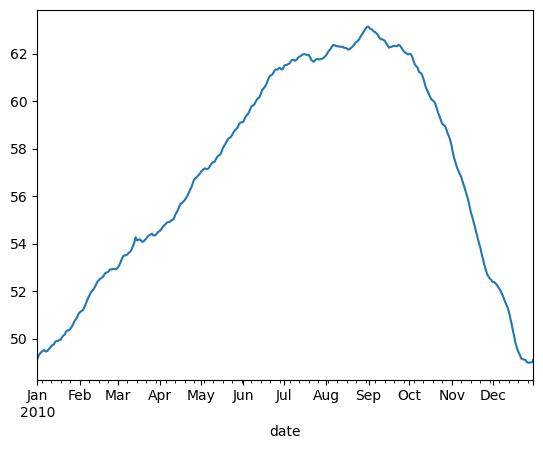

In [16]:
temps_df.resample('d')['temp'].mean().plot()

Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

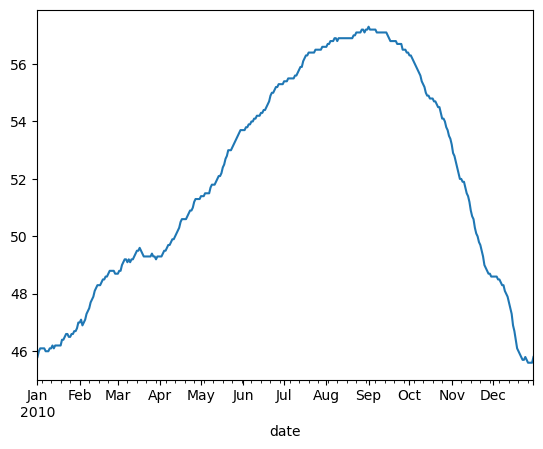

In [18]:
temps_df.resample('d')['temp'].min().plot()

Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

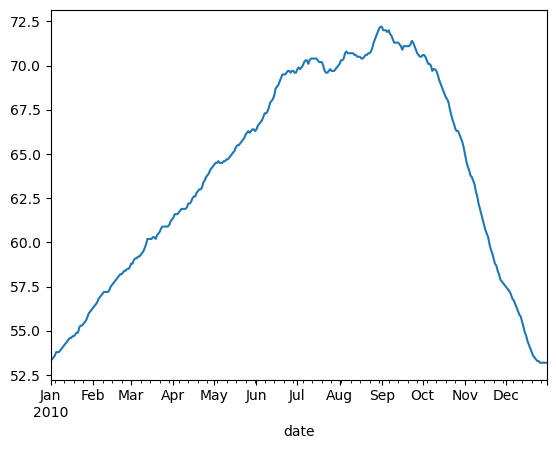

In [19]:
temps_df.resample('d')['temp'].max().plot()

Which month is the coldest, on average?

In [32]:
temps_df.resample('m').mean().sort_values(by='temp')
#January

temp
date                 
2010-01-31  49.984140
2010-12-31  50.498253
2010-02-28  52.243899
2010-03-31  53.956528
2010-11-30  55.185139
2010-04-30  55.633056
2010-05-31  57.970968
2010-10-31  60.253091
2010-06-30  60.444722
2010-07-31  61.765457
2010-08-31  62.405376
2010-09-30  62.487083

Which month has the highest average temperature?

In [33]:
temps_df.resample('m').mean().sort_values(by='temp', ascending = False)
#September

temp
date                 
2010-09-30  62.487083
2010-08-31  62.405376
2010-07-31  61.765457
2010-06-30  60.444722
2010-10-31  60.253091
2010-05-31  57.970968
2010-04-30  55.633056
2010-11-30  55.185139
2010-03-31  53.956528
2010-02-28  52.243899
2010-12-31  50.498253
2010-01-31  49.984140

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day.

In [39]:
delta_df = pd.DataFrame((temps_df.resample('d')['temp'].max() - temps_df.resample('d')['temp'].min()))

In [41]:
delta_df.rename(columns = {'temp':'temp_change'}, inplace = True)

delta_df.head()

temp_change
date                   
2010-01-01          7.5
2010-01-02          7.4
2010-01-03          7.4
2010-01-04          7.5
2010-01-05          7.7

Which month has the highest daily temperature variability?

In [45]:
delta_df.resample('m').mean().sort_values(by = 'temp_change', ascending = False)
#september

temp_change
date                   
2010-09-30    14.403333
2010-07-31    13.977419
2010-06-30    13.950000
2010-08-31    13.870968
2010-10-31    13.432258
2010-05-31    12.909677
2010-04-30    12.320000
2010-03-31    10.854839
2010-11-30    10.236667
2010-02-28     9.485714
2010-01-31     8.341935
2010-12-31     7.925806

<AxesSubplot:xlabel='date'>

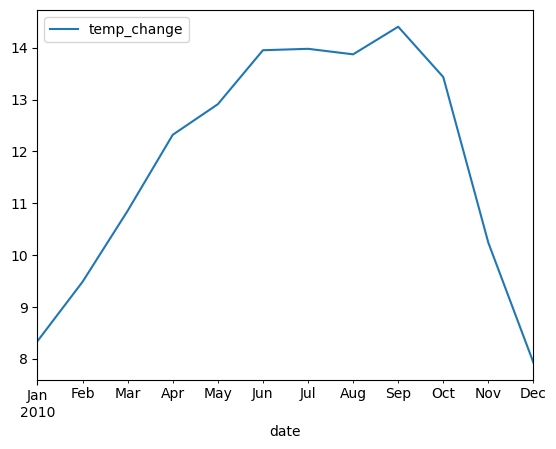

In [46]:
delta_df.resample('m').mean().plot()

# Seattle Weather 

In [3]:
data.seattle_weather()

date  precipitation  temp_max  temp_min  wind  weather
0    2012-01-01            0.0      12.8       5.0   4.7  drizzle
1    2012-01-02           10.9      10.6       2.8   4.5     rain
2    2012-01-03            0.8      11.7       7.2   2.3     rain
3    2012-01-04           20.3      12.2       5.6   4.7     rain
4    2012-01-05            1.3       8.9       2.8   6.1     rain
...         ...            ...       ...       ...   ...      ...
1456 2015-12-27            8.6       4.4       1.7   2.9      fog
1457 2015-12-28            1.5       5.0       1.7   1.3      fog
1458 2015-12-29            0.0       7.2       0.6   2.6      fog
1459 2015-12-30            0.0       5.6      -1.0   3.4      sun
1460 2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

In [47]:
rain_df = data.seattle_weather()

In [48]:
rain_df['date'] = pd.to_datetime(rain_df['date'])
rain_df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [51]:
rain_df = rain_df.set_index('date')

In [52]:
rain_df.head()

precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain

Which year and month combination has the highest amount of precipitation?

In [59]:
rain_df.resample('m').mean().sort_values(by = 'precipitation', ascending = False).head(3)

precipitation   temp_max  temp_min      wind
date                                                    
2015-12-31       9.177419   8.380645  3.825806  4.341935
2014-03-31       7.741935  12.906452  5.425806  3.677419
2015-11-30       7.086667   9.683333  3.480000  3.546667

Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

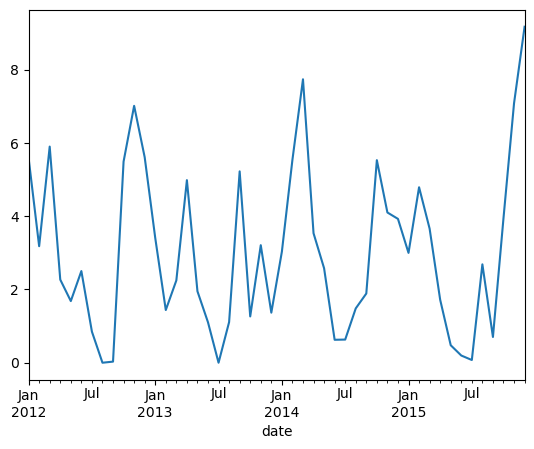

In [61]:
rain_df.resample('m').mean()['precipitation'].plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

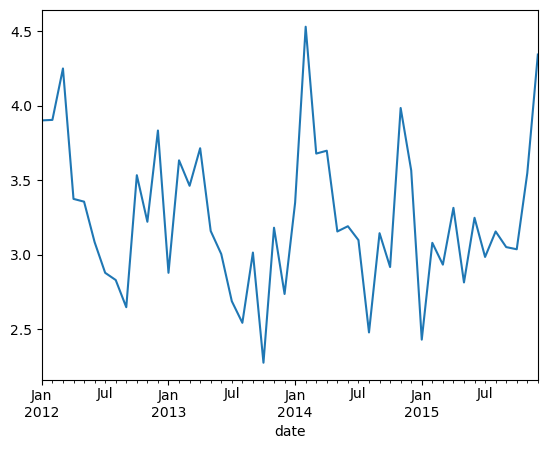

In [66]:
rain_df.resample('m').mean()['wind'].plot()

Which year-month combination is the windiest?

In [67]:
rain_df.resample('m').mean().sort_values(by = 'wind', ascending = False).head(3)

precipitation  temp_max  temp_min      wind
date                                                   
2014-02-28       5.542857  8.200000  2.635714  4.528571
2015-12-31       9.177419  8.380645  3.825806  4.341935
2012-03-31       5.903226  9.554839  2.838710  4.248387

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [69]:
sun_df = rain_df[rain_df['weather'] == 'sun']
sun_df.head()

precipitation  temp_max  temp_min  wind weather
date                                                       
2012-01-08            0.0      10.0       2.8   2.0     sun
2012-01-11            0.0       6.1      -1.1   5.1     sun
2012-01-12            0.0       6.1      -1.7   1.9     sun
2012-01-13            0.0       5.0      -2.8   1.3     sun
2012-02-02            0.0       8.3       1.7   2.6     sun

In [73]:
sun_df.resample('y').count().sort_values(by = 'weather', ascending = False)

#2014

precipitation  temp_max  temp_min  wind  weather
date                                                        
2014-12-31            211       211       211   211      211
2013-12-31            205       205       205   205      205
2015-12-31            180       180       180   180      180
2012-12-31            118       118       118   118      118

In which month does it rain the most?

In [74]:
precip_df = rain_df[rain_df['weather'] == 'rain']
precip_df.head()

precipitation  temp_max  temp_min  wind weather
date                                                       
2012-01-02           10.9      10.6       2.8   4.5    rain
2012-01-03            0.8      11.7       7.2   2.3    rain
2012-01-04           20.3      12.2       5.6   4.7    rain
2012-01-05            1.3       8.9       2.8   6.1    rain
2012-01-06            2.5       4.4       2.2   2.2    rain

In [88]:
precip_df['month'] = precip_df.index.month
precip_df.head()

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_99548/1681788737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precip_df['month'] = precip_df.index.month


precipitation  temp_max  temp_min  wind weather  month
date                                                              
2012-01-02           10.9      10.6       2.8   4.5    rain      1
2012-01-03            0.8      11.7       7.2   2.3    rain      1
2012-01-04           20.3      12.2       5.6   4.7    rain      1
2012-01-05            1.3       8.9       2.8   6.1    rain      1
2012-01-06            2.5       4.4       2.2   2.2    rain      1

In [92]:
precip_df.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
month              int64
dtype: object

Which month has the most number of days with a non-zero amount of precipitation?

# Flights

In [4]:
data.flights_20k()

date  delay  distance origin destination
0     2001-01-13 14:56:00     32       417    SAN         SJC
1     2001-01-31 16:40:00     -5      1093    FLL         ISP
2     2001-02-11 18:39:00      3       293    LBB         DAL
3     2001-01-10 21:00:00    -15       550    MSY         MCO
4     2001-03-30 21:45:00     -2       229    STL         IND
...                   ...    ...       ...    ...         ...
19995 2001-03-22 15:10:00      4       446    SAN         OAK
19996 2001-01-19 13:05:00     -6      1489    SEA         MCI
19997 2001-02-07 11:37:00    -16      1848    MCO         PHX
19998 2001-02-24 16:50:00     42       443    RDU         BNA
19999 2001-03-14 11:33:00      0       328    ABQ         PHX

[20000 rows x 5 columns]

Convert any negative delays to 0.

Which hour of the day has the highest average delay?

Does the day of the week make a difference in the delay amount?

Does the month make a difference in the delay amount?